In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/cars_prices.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
df = df.loc[df['price'] != '?']

In [ ]:
df['price'] = df['price'].astype('float16')

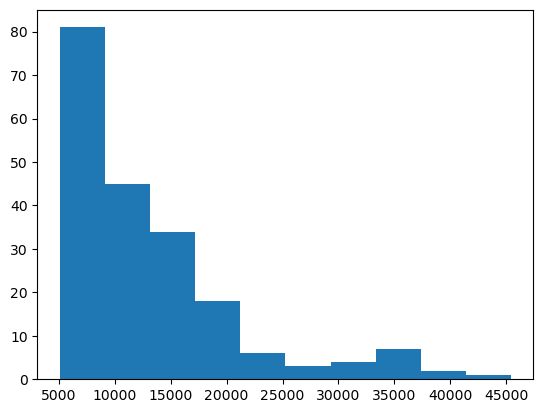

In [ ]:
plt.hist(data=df, x='price', bins=10)
plt.show();

In [ ]:
df.loc[df['make'] == 'audi', 'highway-mpg'].median()

25.0

In [ ]:
df['city-mpg'].corr(df['highway-mpg'])

0.9720437058960109

In [ ]:
df.loc[df['make'].isin(df.groupby('make')['make'].count().sort_values(ascending=False).index[:3]), 'price'].idxmax()

Index(['toyota', 'nissan', 'mazda'], dtype='object', name='make')

In [ ]:
df.groupby('make').agg(MeanPrice=('price', 'mean'), Count=('make', 'count'))\
                  .sort_values(by='MeanPrice', ascending=False)[:3]\
                  .sort_values(by='Count', ascending=False)

,MeanPrice,Count
make,,
mercedes-benz,33650.000000,8
porsche,31396.000000,4
jaguar,34602.667969,3


In [ ]:
df.loc[df['fuel-type'] == 'diesel']['make'].nunique()

7

In [ ]:
df['wheel-base'].quantile(.8), np.percentile(df['wheel-base'], 80)

(103.5, 103.5)

In [ ]:
np.percentile(df['wheel-base'], 80)

103.5